In [ ]:
## Cannonical sensor data (downloaded from kaggle)
Each row represents sensor readings captured at a specific timestamp.
| Column Name   | Type      | Description |
|--------------|-----------|-------------|
| timestamp    | datetime  | Time at which data was recorded |
| temperature  | float     | Ambient temperature in °C (DHT11) |
| humidity     | float     | Relative humidity in % (DHT11) |
| distance     | float     | Distance measured by ultrasonic sensor in cm |


## Notes
- `timestamp` is mandatory and must be converted to datetime
- All sensor values are numeric
- Distance values change with human presence or object movement
- Additional sensors can be added as new columns without changing the pipeline


In [ ]:
import pandas as pd
df=pd.read_csv("iot_telemetry_data.csv")

In [ ]:
df.head()
df.dtypes

In [ ]:
df['ts'].head(1)

In [ ]:
df.head(4)

In [ ]:
df['timestamp']=pd.to_datetime(df['ts'], unit='s')

In [ ]:
df[['timestamp']].head()

In [ ]:
df['temperature']=(df['temp']-32)*5/9

In [ ]:
df['temperature'].head()


In [ ]:
df['distance'] = df['motion'].apply(lambda x: 50 if x else 200)


In [ ]:
df[['motion', 'distance']].head()


In [ ]:
df.head()

In [ ]:
final_df=df[['timestamp', 'temperature', 'humidity', 'distance']]

In [ ]:
final_df.head()


In [ ]:
final_df.dtypes

In [ ]:
final_df.describe()

In [2]:
import pandas as pd

df = pd.read_csv("iot_telemetry_data.csv")

df['timestamp'] = pd.to_datetime(df['ts'], unit='s')
df['temperature'] = (df['temp'] - 32) * 5/9
df['distance'] = df['motion'].apply(lambda x: 50 if x else 200)

final_df = df[['timestamp', 'temperature', 'humidity', 'distance']]


In [3]:
final_df.head()


,timestamp,temperature,humidity,distance
0,2020-05-20 18:40:00,-5.166667,51.000000,200
1,2020-05-20 18:40:00,-6.833333,76.000000,200
2,2020-05-20 18:40:00,-5.222222,50.900000,200
3,2020-05-20 18:40:00,-2.777778,76.800003,200
4,2020-05-20 18:40:00,-5.222222,50.900000,200


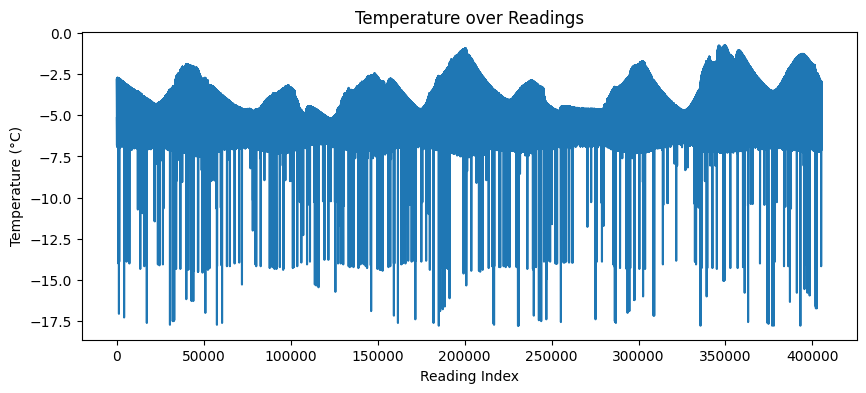

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(final_df.index, final_df['temperature'])
plt.title("Temperature over Readings")
plt.xlabel("Reading Index")
plt.ylabel("Temperature (°C)")
plt.show()
